In [4]:
from networkit import *
import glob
from tqdm import tqdm_notebook
import networkit as nx
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pickle

In [2]:
nx.setNumberOfThreads(20)
nx.setLogLevel("TRACE")

In [7]:
with open('../user_details.json') as fp:
    dict_users_original = json.load(fp)
with open('../Networks/interaction_network_per_month.json', 'rb') as fp:
    data = pickle.load(fp)
with open('../Networks/kcore_temportal.json', 'rb') as fp:
    monthwise_kcore_dict = pickle.load(fp)  
with open('../Networks/map_dict_kcore.json', 'rb') as fp:
    map_dict_kcore = pickle.load(fp)  
    
df_user_label=pd.read_csv('../Results/user_labelling.csv')
all_normal_dict={key:1 for key in list(df_user_label[df_user_label['label']=='normal']['user_key'])}
df_matched=pd.read_csv('../Results/matched_fear_hate.csv')

In [8]:
with open('../Networks/betweeness_centrality.json', 'rb') as fp:
    betweenness_data = pickle.load(fp)
    
with open('../Networks/eigen_vector_centrality.json', 'rb') as fp:
    eigen_data = pickle.load(fp)


In [9]:
file = '../../../../GAB_data/FollowersFollowing/Follow_Following_June2018.json'

In [10]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())
colours=data['data'][0]['node']['color']

def get_sources_target_val(df):
    dict_tuples={}
    for i in range(0,len(months_list)-1):
        key=tuple([months_list[i],months_list[i+1]])
        dict_tuples[key]={}
        wide_df = df[['label',months_list[i],months_list[i+1],'freq']].groupby(['label',months_list[i],months_list[i+1]], as_index=False).sum()
        columns=list(wide_df.columns)[1:3]
        for index,row in wide_df.iterrows():
            dict_tuples[key][tuple([row[columns[0]],row[columns[1]]])]=row['freq']
    sources=[]
    target=[]
    values=[]
    colour_values=[]
    i=0
    for key in dict_tuples.keys():
        for element in sorted(list(dict_tuples[key].keys())):

            source_index=label[key[0]+'-'+str(element[0])]
            target_index=label[key[1]+'-'+str(element[1])]
            value=dict_tuples[key][element]

            sources.append(source_index)
            target.append(target_index)
            values.append(value)
            colour_values.append(colours[i].replace("0.8", str(0.4)))
        i+=1
    return sources,target,values,colour_values,dict_tuples



def get_plotly_figure(sources,target,values,colour_values,labels_modified):
    layout = go.Layout(
      margin=go.layout.Margin(
            l=1, #left margin
            r=1, #right margin
            b=10, #bottom margin
            t=2  #top margin
        )
    )


    fig = go.Figure(data=[go.Sankey(
        arrangement = "snap",
        node = dict(
          pad = 15,
          thickness = 1,
          line = dict(color = "black", width = 0.2),
          label = labels_modified,
          color='black'
        ),
        link = dict(
          source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = values,
          color=colours_value

      ))],layout=layout)
    return fig

### Final analysis

In [27]:
count=0
followers_count=[]
following_count=[]
eigen_vector_centrality=[]
betweeness_centrality=[]
post_count=[]
label=[]
user_keys=[]

for index,row in tqdm_notebook(df_matched.iterrows(),total=len(df_matched)):
    temp=dict_users_original[row['treatment']]
    betweeness_centrality.append(betweenness_data[row['treatment']])
    eigen_vector_centrality.append(eigen_data[row['treatment']])

    post_count.append(temp['number_of_posts'])
    followers_count.append(temp['followers_count'])
    following_count.append(temp['followings_count'])
    label.append(list(df_user_label[df_user_label['user_key']==row['treatment']]['label'])[0])
    user_keys.append(row['treatment'])

    temp=dict_users_original[row['control']]
    betweeness_centrality.append(betweenness_data[row['control']])
    eigen_vector_centrality.append(eigen_data[row['control']])

    post_count.append(temp['number_of_posts'])
    followers_count.append(temp['followers_count'])
    following_count.append(temp['followings_count'])
    label.append(list(df_user_label[df_user_label['user_key']==row['control']]['label'])[0])
    user_keys.append(row['control'])



<ipython-input-27-12afe5bf98d6>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index,row in tqdm_notebook(df_matched.iterrows(),total=len(df_matched)):


  0%|          | 0/476 [00:00<?, ?it/s]

In [28]:
temp

{'number_of_posts': 389, 'followers_count': 4, 'followings_count': 0}

In [29]:
temp

{'number_of_posts': 389, 'followers_count': 4, 'followings_count': 0}

In [30]:
df_users_final= pd.DataFrame(
    {'key': user_keys,
     'label': label,
     'betweenness':betweeness_centrality,
     'eigen_vector':eigen_vector_centrality,
     'followers_count': followers_count,
     'followings_count': following_count,
     'post_count': post_count
    })


In [31]:
df_users_final

,key,label,betweenness,eigen_vector,followers_count,followings_count,post_count
0,john5927,both,0.000014,0.002626,807,847,2613
1,libtardOZ,both,0.000246,0.032018,5037,11274,871
2,Spotted_Lady,both,0.000000,0.000068,205,7,4047
3,libtardOZ,both,0.000246,0.032018,5037,11274,871
4,battleaxebill,both,0.000000,0.001121,438,254,1409
...,...,...,...,...,...,...,...
947,Obbop,both,0.000000,0.000000,4,0,389
948,hillbilly1488,hatespeech,0.000014,0.001747,551,416,894
949,Obbop,both,0.000000,0.000000,4,0,389
950,JohnBalnis1,hatespeech,0.000000,0.000480,47,85,1399


In [32]:
df_users_final['label'].replace({'both': 'hybrid','fearspeech':'fear','hatespeech':'hate'}, inplace=True)

In [33]:
df_users_final_not_normal=df_users_final[~df_users_final['label'].str.contains("normal")]

In [34]:
df_users_final_normal=df_users_final[df_users_final['label'].str.contains("normal")]

### Following frequency

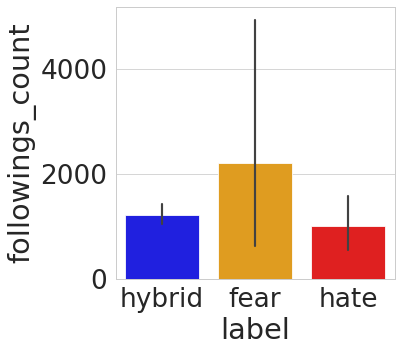

In [35]:
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.set(context='paper',style='whitegrid',font_scale=3)

# sns.set_theme(style="whitegrid")

# tips = sns.load_dataset("tips")
ax = sns.barplot(x="label",y="followings_count", data=df_users_final_not_normal, palette=['blue','orange','red'])
#plt.show()
path='../Results/following.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

### Followers frequency

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.set(context='paper',style='whitegrid',font_scale=3)
ax = sns.barplot(x="label",y="followers_count", data=df_users_final_not_normal,palette=['blue','orange','red'])
#plt.show()
path='../Results/followers.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

### Betweenness centrality


In [ ]:
import numpy as np
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.set(context='paper',style='whitegrid',font_scale=3)

# sns.set_theme(style="whitegrid")

# tips = sns.load_dataset("tips")
ax = sns.barplot(x="label",y="betweenness", data=df_users_final_not_normal, palette=['blue','orange','red'])
#plt.show()
path='../Results/betweenness_centrality.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

### Eigen Vector centrality

In [ ]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.set(context='paper',style='whitegrid',font_scale=3)

# sns.set_theme(style="whitegrid")

# tips = sns.load_dataset("tips")
ax = sns.barplot(x="label",y="eigen_vector", data=df_users_final_not_normal, palette=['blue','orange','red'])
#plt.show()
path='../Results/eigen_vector_centrality.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
# compare samples
column_name='betweenness'
treatment=list(df_users_final_not_normal[df_users_final_not_normal['label']=='hate'][column_name])
control=list(df_users_final_not_normal[df_users_final_not_normal['label']=='fear'][column_name])
stat, p = mannwhitneyu(treatment, control,alternative='two-sided')
print('Statistics=%.3f, p=%.10f' % (stat, p))



In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
# compare samples
column_name='eigen_vector'
treatment=list(df_users_final_normal[df_users_final_normal['label']=='normal_both'][column_name])
control=list(df_users_final_not_normal[df_users_final_not_normal['label']=='hybrid'][column_name])
stat, p = mannwhitneyu(treatment, control,alternative='two-sided')
print('Statistics=%.3f, p=%.10f' % (stat, p))



In [ ]:
df_users_final_not_normal

In [ ]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']
years=['2016','2017','2018']

In [ ]:
columns=['user_key','label']
for year in years:
    for month_key,month in enumerate(months):
        try:
            kcores=monthwise_kcore_dict[month+year]
        except KeyError:
            continue
        columns.append(str(month_key+1)+'/'+year[2:])

In [ ]:
df_user_label

In [ ]:
list_timeline=[]
for index,row in tqdm_notebook(df_user_label.iterrows(),total=len(df_user_label)):
    temp_user=[row['user_key'],row['label']]
    for year in years:
        for month_key,month in enumerate(months):
            try:
                kcores=monthwise_kcore_dict[month+year]
            except KeyError:
                continue
            try:
                temp_user.append(int(kcores[map_dict_kcore[row['user_key']]]))
            except KeyError:
                temp_user.append(-1)
    list_timeline.append(temp_user)

In [ ]:
df_users_timeline=pd.DataFrame(list_timeline,columns=columns)

In [2]:
df_users_timeline.label.value_counts()

normal        124491
ambiguous      30887
both            3432
hatespeech      2472
fearspeech      1595
Name: label, dtype: int64

In [ ]:
df_users_timeline.to_csv('../Results/kcore_analysis.csv',index=False)

### K-core analysis

In [1]:
import pandas as pd
from tqdm import tqdm_notebook
df_users_timeline=pd.read_csv('../Results/kcore_analysis.csv')
df_users_timeline['freq']=1


In [ ]:
df_users_timeline = df_users_timeline.replace([-1],99)

In [ ]:
df_users_timeline

In [ ]:
df_users_timeline_both=df_users_timeline[df_users_timeline['label']=='both']
df_users_timeline_fear=df_users_timeline[df_users_timeline['label']=='fearspeech']
df_users_timeline_hate=df_users_timeline[df_users_timeline['label']=='hatespeech']

In [ ]:
months_list=list(df_users_timeline.columns)[2:-1]

In [ ]:
label={}
count=0
for month in months_list:
    for i in range(0,10,1):
        label[month+'-'+str(i)]=count
        count+=1        
    label[month+'-'+str(99)]=count
    count+=1

In [ ]:
labels_modified=[]
for ele in list(label.keys()):
    if ele.split('-')[1]=='99':
        labels_modified.append('NA')
    else:
        labels_modified.append(ele.split('-')[1])


In [ ]:
sources,target,values,colours_value,dict_tuples=get_sources_target_val(df_users_timeline_both)
fig = get_plotly_figure(sources,target,values,colours_value,labels_modified)
fig.write_image("../Results/sankey_both.pdf")

In [ ]:
sources,target,values,colours_value,dict_tuples=get_sources_target_val(df_users_timeline_fear)
fig = get_plotly_figure(sources,target,values,colours_value,labels_modified)
fig.write_image("../Results/sankey_fear.pdf")

In [ ]:
sources,target,values,colours_value,dict_tuples=get_sources_target_val(df_users_timeline_hate)
fig = get_plotly_figure(sources,target,values,colours_value,labels_modified)
fig.write_image("../Results/sankey_hate.pdf")

In [ ]:
acceleration=[]
time_to_reach=[]
for index,row in tqdm_notebook(df_users_timeline.iterrows(),total=len(df_users_timeline)):
    count=0
    flag=0
    initial=-1
    final=-1
    for element in list(df_users_timeline.columns)[2:-1]:
        
        if(row[element]==0):
            final=row[element]
            flag=1
            break
        elif(row[element]!=99):
            count+=1
            if(initial==-1):
                initial=row[element]
            
        if(flag!=0):
            final=row[element]
            
            
        
    if(count>0):
         acceleration.append((initial-final)/count)
    else:
         acceleration.append(0)
            
    if(final==0):
         time_to_reach.append(count)
    else:
         time_to_reach.append(-1)
            
    

In [ ]:
df_users_timeline['time_to_reach']=time_to_reach
df_users_timeline['velocity']=acceleration


In [ ]:
df_users_timeline_temp=df_users_timeline[df_users_timeline['label'].isin(['both','fearspeech','hatespeech'])]
df_users_timeline_temp=df_users_timeline_temp[df_users_timeline_temp['time_to_reach']>=0]
df_users_timeline_temp['label'].replace({'both': 'hybrid','fearspeech':'fear','hatespeech':'hate'}, inplace=True)

In [ ]:
len(df_users_timeline)

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
seed(1)
column_name='time_to_reach'
treatment=list(df_users_timeline_temp[(df_users_timeline_temp['label']=='fear')][column_name])
control=list(df_users_timeline_temp[(df_users_timeline_temp['label']=='hate')][column_name])
stat, p = mannwhitneyu(treatment, control,alternative='less')
print('Statistics=%.3f, p=%.10f' % (stat, p))

In [ ]:
np.mean(list(df_users_timeline_temp[(df_users_timeline_temp['label']=='hybrid')]['time_to_reach']))

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.set(context='paper',style='whitegrid',font_scale=3)
ax = sns.barplot(x="label",y="time_to_reach", data=df_users_timeline_temp,palette=['blue','orange','red'])
#plt.show()
path='../Results/time_to_reach_core.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

In [ ]:
ratio_details={0:{},1:{},2:{},3:{},4:{}}

for index,row in tqdm_notebook(df_users_timeline.iterrows(),total=len(df_users_timeline)):
    count=0
    flag=0
    for element in list(df_users_timeline.columns)[2:-2]:
        if(row[element]<4):
            try:
                ratio_details[row[element]][element][row['label']]+=1
            except:
                try:
                    ratio_details[row[element]][element][row['label']]=1
                except KeyError:
                    ratio_details[row[element]][element]={}
                    ratio_details[row[element]][element][row['label']]=1
        
        if(row[element]!=99):
            try:
                ratio_details[4][element][row['label']]+=1
            except:
                try:
                    ratio_details[4][element][row['label']]=1
                except KeyError:
                    ratio_details[4][element]={}
                    ratio_details[4][element][row['label']]=1
        
    

In [ ]:
timeline_ratios=[]

for key in list(df_users_timeline.columns[2:-3]):
    ratio_zero_fs = ratio_details[0][key]['fearspeech']/ratio_details[4][key]['fearspeech']
    ratio_zero_hs = ratio_details[0][key]['hatespeech']/ratio_details[4][key]['hatespeech']
    ratio_zero_b = ratio_details[0][key]['both']/ratio_details[4][key]['both']
    
#     ratio_one = ratio_details[1][key]['fearspeech']/ratio_details[1][key]['hatespeech']
#     ratio_two = ratio_details[2][key]['fearspeech']/ratio_details[2][key]['hatespeech']
#     ratio_three = ratio_details[3][key]['fearspeech']/ratio_details[3][key]['hatespeech']
    
    timeline_ratios.append([key,ratio_zero_fs, 'fear'])
    timeline_ratios.append([key,ratio_zero_hs, 'hate'])
    timeline_ratios.append([key,ratio_zero_b,'hybrid'])
#     timeline_ratios.append([key,ratio_three,'Core-3'])
    
df_timeline_ratios=pd.DataFrame(timeline_ratios,columns=['month','ratio of #fearspeech/#hatespeech', 'label'])

In [ ]:
df_timeline_ratios

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 5)
sns.set(context='paper',style='whitegrid',font_scale=1.5)

ax = sns.lineplot(x='month',y='ratio of #fearspeech/#hatespeech',style='label',hue='label',hue_order=['fear','hate','hybrid'],palette=['red','orange','blue'], data=df_timeline_ratios,markers=True,markersize=9)
#plt.show()
plt.ylabel('ratio of #core-0/#total')
path='../Results/ratio_core_users.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

### Follower distribution

In [ ]:
import networkx


def get_graph_features(file):
    map_dict={}
    follower_dict={}
    count=0
    with open(file) as fp:
        dict_follower_followship=json.load(fp)

    for user_key in tqdm_notebook(dict_follower_followship.keys()):
        try:
            temp=map_dict[user_key]
        except KeyError:
            map_dict[user_key]=count
            count+=1



        for user_follower in dict_follower_followship[user_key]['follower']:
            try:
                temp=map_dict[user_follower]
            except KeyError:
                map_dict[user_follower]=count
                count+=1

            try:
                follower_dict[map_dict[user_key]][map_dict[user_follower]]=1
            except KeyError:
                follower_dict[map_dict[user_key]]={}
                follower_dict[map_dict[user_key]][map_dict[user_follower]]=1

    reverse_map_dict={value:key for key,value in map_dict.items()}

    G = networkx.DiGraph()
    for user_key in follower_dict.keys():
        for follower_key in follower_dict[user_key].keys():
            G.add_edge(user_key, follower_key)
            
    return G, map_dict, reverse_map_dict



In [ ]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']
years=['2016','2017','2018']
list_users_follower_distribution=[]
for year in years:
    for month_key,month in enumerate(months):
        name=month+year
        file='../../../../GAB_data/FollowersFollowing/Follow_Following_'+month+year+'.json'
        try:
            follower_dict={}
            with open(file) as fp:
                dict_follower_followship=json.load(fp)
        except: 
            print("tte")
            continue
        G, map_dict, reverse_map_dict=get_graph_features(file)
        
        
        for index,row in tqdm_notebook(df_user_label.iterrows(),total=len(df_user_label)):
            fear=0
            both=0
            normal=0
            total=0
            if(row['label']=='ambiguous'):
                continue
                
            try:
                succesors=list(G.successors(map_dict[row['user_key']]))
                for suc in succesors:
                    user_suc_name=reverse_map_dict[suc]
                    try:
                        temp=fearspeech_users_dict[user_suc_name]
                        fear+=1
                        total+=1

                    except KeyError:
                        pass


                    try:
                        temp=both_users_dict[user_suc_name]
                        both+=1
                        total+=1

                    except KeyError:
                        pass


                    try:
                        temp=hatespeech_users_dict[user_suc_name]
                        hate+=1
                        total+=1

                    except KeyError:
                        pass


                    try:
                        temp=all_normal_dict[user_suc_name]
                        normal+=1
                        total+=1

                    except KeyError:
                        pass


            except (nx.NetworkXError, KeyError) as e:
                pass
            if(total>0):
                date_key=str(month_key+1)+'/'+year[2:]
                list_users_follower_distribution.append([row['user_key'],date_key,row['label'],'normal',normal/total])
                

In [ ]:
df_follower_dist=pd.DataFrame(list_users_follower_distribution,columns=['user','month-year','label','follower_label','ratio'])

In [ ]:
df_follower_dist['label'].replace({'both': 'hybrid','fearspeech':'fear','hatespeech':'hate'}, inplace=True)

In [ ]:
df_follower_dist

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 5)

sns.set(context='paper',style='whitegrid',font_scale=1.5, rc={"lines.linewidth": 2.0,"lines.markersize": 10})
sns.lineplot(x='month-year',y='ratio', data=df_follower_dist,hue='label',hue_order=['fear','hate','normal','hybrid'],palette=['red','orange','green','blue'],markers=True)
plt.xlabel("Time")
plt.ylabel("ratio of normal followers")
path='../Results/followers_temporal.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)
plt.show()    

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
# compare samples
column_name='ratio'
treatment=list(df_follower_dist[(df_follower_dist['label']=='fear') & (df_follower_dist['follower_label']=='normal')][column_name])
control=list(df_follower_dist[(df_follower_dist['label']=='hybrid') & (df_follower_dist['follower_label']=='normal')][column_name])
stat, p = mannwhitneyu(treatment, control,alternative='greater')
print('Statistics=%.3f, p=%.20f' % (stat, p))



In [ ]:
fearspeech_users_dict={row['user_key']:1 for index,row in df_users_timeline_fear.iterrows()}
hatespeech_users_dict={row['user_key']:1 for index,row in df_users_timeline_hate.iterrows()}
both_users_dict={row['user_key']:1 for index,row in df_users_timeline_both.iterrows()}


In [ ]:
len(both_users_dict)

## Interaction network

In [ ]:
with open('../Networks/interaction_network_per_month.json', 'rb') as fp:
    interaction_data = pickle.load(fp)


In [ ]:
interaction_dict={}

for month_year in tqdm_notebook(interaction_data.keys()):
    user_data=interaction_data[month_year]
    for key in user_data.keys():
        try:
            interaction_dict[key[0]][key[1]]+=user_data[key]['replies']
        except KeyError:
            try:
                interaction_dict[key[0]][key[1]]=user_data[key]['replies']
            except KeyError:
                interaction_dict[key[0]]={}
                interaction_dict[key[0]][key[1]]=user_data[key]['replies']
            

In [ ]:
user_data[key]

In [ ]:
import networkx
G = networkx.DiGraph()
for user_key in tqdm_notebook(interaction_dict.keys()):
    
    for inter_user_key in interaction_dict[user_key].keys():
        
        if(user_key==inter_user_key):
            continue
        
        if(interaction_dict[user_key][inter_user_key]>0):
            G.add_edge(inter_user_key,user_key,weight=interaction_dict[user_key][inter_user_key])


In [ ]:
list_users_repost_distribution=[]

for index,row in tqdm_notebook(df_user_label.iterrows(),total=len(df_user_label)):
    
    fear=0
    hate=0
    normal=0
    both=0
    total_fear=0
    total_both=0
    total_normal=0
    total_hate=0
    total=0
    
    if('normal' in row['label']):
        row['label']='normal'
    
    
    if(row['label']=='ambiguous'):
        continue
    if(row['label']=='fearspeech'):
        row['label']='fear'
    if(row['label']=='hatespeech'):
        row['label']='hate'
    if(row['label']=='both'):
        row['label']='hybrid'
    
    try:
        succesors=list(G.successors(row['user_key']))
        for user_suc_name in succesors:
            weight=G[row['user_key']][user_suc_name]["weight"]
            
            
            
            try:
                temp=fearspeech_users_dict[user_suc_name]
                fear+=weight
                total_fear+=1
                total+=1
            except KeyError:
                pass
            
            
            try:
                temp=both_users_dict[user_suc_name]
                both+=weight
                total_both+=1
                total+=1
            except KeyError:
                pass
            
            
            try:
                temp=hatespeech_users_dict[user_suc_name]
                hate+=weight
                total_hate+=1
                total+=1    
            except KeyError:
                pass
            
            
            try:
                temp=all_normal_dict[user_suc_name]
                normal+=weight
                total_normal+=1
                total+=1
            except KeyError:
                pass
            
    
    except (nx.NetworkXError, KeyError) as e:
        pass
    
    
    if(total_fear>0):
        list_users_repost_distribution.append([row['user_key'],row['label'],'fear',fear])
    if(total_hate>0):
        list_users_repost_distribution.append([row['user_key'],row['label'],'hate',hate])
    if(total_normal>0):
        list_users_repost_distribution.append([row['user_key'],row['label'],'normal',normal])
    if(total_both>0):
        list_users_repost_distribution.append([row['user_key'],row['label'],'hybrid',both])
                                                 
                                                 
    
        

In [ ]:
df_repost_dist=pd.DataFrame(list_users_repost_distribution,columns=['user','label','repost_label','average'])

In [ ]:
df_repost_dist.head(5)

In [ ]:
edge_list={}

for label1 in list(df_repost_dist['label'].unique()):
    nodes_dict={'nodes':[],'weight':[]}
    num_total=df_repost_dist[(df_repost_dist['label']==label1)]['average'].sum()
    for label2 in list(df_repost_dist['label'].unique()):
        num=df_repost_dist[(df_repost_dist['label']==label1) & (df_repost_dist['repost_label']==label2)]['average'].sum()
        nodes_dict['nodes'].append(label2)
        nodes_dict['weight'].append(100*num/num_total)
        
    edge_list[label1]=nodes_dict
        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
matplotlib.rcParams['figure.figsize'] = (15, 5)

# data = [15, 25, 25, 30, 5]
# labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:4]
colors = sns.color_palette('pastel')[0:4]

# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 4,wspace=0.2)
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.pie(edge_list['fear']['weight'], labels = edge_list['fear']['nodes'], colors = colors_m, autopct='%.0f%%',textprops=dict(color="w"))
plt.title('fear users')


ax = plt.subplot(gs[0, 1]) # row 0, col 1
plt.pie(edge_list['hate']['weight'], labels = edge_list['hate']['nodes'], colors = colors_m, autopct='%.0f%%',textprops=dict(color="w"))
plt.title('hate users')


ax = plt.subplot(gs[0, 2]) # row 0, col 1
plt.pie(edge_list['hybrid']['weight'], labels = edge_list['hybrid']['nodes'], colors = colors_m, autopct='%.0f%%',textprops=dict(color="w"))
plt.title('hybrid users')

ax = plt.subplot(gs[0, 3]) # row 0, col 1
plt.pie(edge_list['normal']['weight'], labels = edge_list['normal']['nodes'], colors = colors_m, autopct='%.0f%%',textprops=dict(color="w"))
plt.title('normal users')


plt.legend(loc='right',bbox_to_anchor=(1.7, 0.5))
path='../Results/replies_distribution.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)


In [ ]:
colors_m=['green','blue','orange','red']

In [ ]:
df_repost_dist[(df_repost_dist['label']=='fearspeech') & (df_repost_dist['repost_label']=='fear')]

In [ ]:
df_users_final_not_normal.label.value_counts()

### Hybrid Users

In [ ]:
threshold={'hatespeech':0.9,'fearspeech':0.7,'normal':0.7}
dict_labels={'hatespeech':2,'fearspeech':1,'normal':0}
reverse_dict_labels={dict_labels[key]:key for key in dict_labels.keys()}

In [ ]:
df_user_label=pd.read_csv('../Results/user_labelling.csv')

all_hybrid_dict={key:1 for key in list(df_user_label[df_user_label['label']=='both']['user_key'])}


In [ ]:
from datetime import datetime


In [ ]:
dict_users={}
files = sorted(glob.glob('../../Gab_Data/new_features_old_gab/gab_fear_hate_features*.pickle'))

dict_users_ambi={}

for file in tqdm_notebook(files,total=len(files)):
    
    
    
    with open(file, 'rb') as handle:
        Gab_keyword_match = pickle.load(handle)
        
    if('predicted_probab' not in Gab_keyword_match[1].keys()):
        continue
    for element in Gab_keyword_match:
        
        try:
            dt = datetime.fromisoformat(element['post_create_time'])
            key_new=str(dt.month)+'/'+str(dt.year)
        except KeyError:
            continue

        
        try:
            temp=all_hybrid_dict[element['username']]
        except KeyError:
            continue
            
            
            
        labels=[]
        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>threshold[reverse_dict_labels[i]]):
                labels.append(reverse_dict_labels[i])
        
        if('fearspeech' in labels):
            try:
                dict_users[key_new][element['username']]['fearspeech']+=1
            except KeyError:
                try:
                   dict_users[key_new][element['username']]['fearspeech']=1
                except KeyError:
                    try:
                           dict_users[key_new][element['username']]={}
                           dict_users[key_new][element['username']]['fearspeech']=1
                    except KeyError:
                           dict_users[key_new]={}
                           dict_users[key_new][element['username']]={}
                           dict_users[key_new][element['username']]['fearspeech']=1
        if('hatespeech' in labels):
            try:
                dict_users[key_new][element['username']]['hatespeech']+=1
            except KeyError:
                try:
                   dict_users[key_new][element['username']]['hatespeech']=1
                except KeyError:
                    try:
                           dict_users[key_new][element['username']]={}
                           dict_users[key_new][element['username']]['hatespeech']=1
                    except KeyError:
                           dict_users[key_new]={}
                           dict_users[key_new][element['username']]={}
                           dict_users[key_new][element['username']]['hatespeech']=1
                           
           
        

In [ ]:
month_year=[]
for year in ['2016','2017','2018']:
    for i in range(1,13):
        month_year.append(str(i)+'/'+year)

In [ ]:
list_month_wise=[]


for month_key in month_year:
    try:
        temp=dict_users[month_key]
    except KeyError:
        continue
        
    fearspeech=0
    hatespeech=0
    
    for key in dict_users[month_key]:
        try:
            fearspeech+=dict_users[month_key][key]['fearspeech']
        except KeyError:
            pass
        
        try:
            hatespeech+=dict_users[month_key][key]['hatespeech']
        except KeyError:
            pass

        
    
    list_month_wise.append([month_key,fearspeech,hatespeech])
    
        

In [ ]:
df=pd.DataFrame(list_month_wise,columns=['month_year','fearspeech','hatespeech'])

In [ ]:
df=df.set_index('month_year')
df.head(5)

In [ ]:
df_normalise=df.div(df.sum(axis=1), axis=0)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.set(context='paper',style='whitegrid',font_scale=1.5)
df_normalise.plot(kind='bar', stacked=True, color=['red','orange'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
path='../Results/temporal_hybrid.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)

In [4]:
import graphistry, pandas as pd

In [8]:
graphistry.register(api=3, username='punyajoy', password='graphcnerghate', protocol='https', server='hub.graphistry.com')


In [9]:
g = graphistry.edges(pd.DataFrame({
    's': ['a', 'b', 'c'],
    'd': ['b', 'c', 'a'],
    'v': [1, 1, 2]
}), 's', 'd')

g = g.settings(url_params={'play': 0})

In [10]:
public_url = g.plot(render=False)

In [11]:
public_url

'https://hub.graphistry.com/graph/graph.html?dataset=c4adc3ab1e204a2ba72e98b9530578c4&type=arrow&viztoken=5c656055-2eab-490a-8167-36d5d163e1ec&usertag=3efda1f4-pygraphistry-0.20.5&splashAfter=1646795662&info=true&play=0'

In [13]:
import datetime, pandas as pd
e_df = pd.DataFrame({
    's': ['a', 'b', 'c', 'a', 'd', 'e'],
    'd': ['b', 'c', 'a', 'c', 'e', 'd'],
    'time': [datetime.datetime(1987, 10, 1), datetime.datetime(1987, 10, 2), datetime.datetime(1987, 10, 3),
          datetime.datetime(1988, 10, 1), datetime.datetime(1988, 10, 2), datetime.datetime(1988, 10, 3)]
})
n_df = pd.DataFrame({
    'n': ['a', 'b', 'c', 'd', 'e'],
    'score': [ 0, 30, 50, 70, 90 ],
    'palette_color_int32': pd.Series(
        [0, 1, 2, 3, 4],
        dtype='int32'),
    'hex_color_int64': pd.Series(
        [0xFF000000, 0xFFFF0000, 0xFFFFFF00, 0x00FF0000, 0x0000FF00],
        dtype='int64'),
    'type': ['mac', 'macbook', 'mac', 'macbook', 'sheep']
})
g = graphistry.edges(e_df, 's', 'd').nodes(n_df, 'n')

In [14]:
g

{'bindings': {'edges':    s  d       time
  0  a  b 1987-10-01
  1  b  c 1987-10-02
  2  c  a 1987-10-03
  3  a  c 1988-10-01
  4  d  e 1988-10-02
  5  e  d 1988-10-03,
  'nodes':    n  score  palette_color_int32  hex_color_int64     type
  0  a      0                    0       4278190080      mac
  1  b     30                    1       4294901760  macbook
  2  c     50                    2       4294967040      mac
  3  d     70                    3         16711680  macbook
  4  e     90                    4            65280    sheep,
  'source': 's',
  'destination': 'd',
  'node': 'n',
  'edge_label': None,
  'edge_color': None,
  'edge_size': None,
  'edge_weight': None,
  'edge_title': None,
  'edge_icon': None,
  'edge_opacity': None,
  'edge_source_color': None,
  'edge_destination_color': None,
  'point_label': None,
  'point_color': None,
  'point_size': None,
  'point_weight': None,
  'point_title': None,
  'point_icon': None,
  'point_opacity': None,
  'point_x': None,
  

In [ ]:
map_dict={}
follower_dict={}
count=0
with open(file) as fp:
    dict_follower_followship=json.load(fp)

for user_key in tqdm_notebook(dict_follower_followship.keys()):
    try:
        temp=map_dict[user_key]
    except KeyError:
        map_dict[user_key]=count
        count+=1



    for user_follower in dict_follower_followship[user_key]['follower']:
        try:
            temp=map_dict[user_follower]
        except KeyError:
            map_dict[user_follower]=count
            count+=1

        try:
            follower_dict[map_dict[user_key]][map_dict[user_follower]]=1
        except KeyError:
            follower_dict[map_dict[user_key]]={}
            follower_dict[map_dict[user_key]][map_dict[user_follower]]=1

reverse_map_dict={value:key for key,value in map_dict.items()}

G = nx.DiGraph()
for user_key in follower_dict.keys():
    for follower_key in follower_dict[user_key].keys():
        G.add_edge(user_key, follower_key)

return G, map_dict, reverse_map_dict
